<a href="https://colab.research.google.com/github/saikrishna1108/Introduction-to-Machine-Learning/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1a


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
path = "/content/drive/MyDrive/Housing.csv"
data = pd.read_csv(path)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
input_variables = ["price","area", "bedrooms", "bathrooms", "stories", "parking"]
new_data = data[input_variables].replace({'yes':1,'no':0})
new_data.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [ ]:
np.random.seed(0)
train, test = train_test_split(new_data, train_size = 0.8, test_size = 0.2, random_state = 100)
train.head()


,price,area,bedrooms,bathrooms,stories,parking
22,8645000,8050,3,1,1,1
41,7840000,6360,3,2,4,0
91,6419000,6750,2,1,1,2
118,5950000,6420,3,1,1,0
472,3010000,3630,4,1,2,3


In [ ]:
def loss_value(x,y,theta):
  m = len(y)
  h= x.dot(theta)
  error = np.subtract(h,y)
  square_error = np.square(error)
  sum = (1/ (2*m)) * np.sum(square_error)
  return sum
def gradient_value(x_train,x_test,y_train,y_test,theta,iterations,learning_rate):
  n = len(y_train)
  cost_history1 = np.zeros(iterations)
  cost_history2 = np.zeros(iterations)
  for i in range(iterations):
    h = x_train.dot(theta)
    error = np.subtract(h,y_train)
    diff = (1/(n))*(x_train.transpose()).dot(error)
    theta = theta - learning_rate * diff
    cost_history1[i] = loss_value(x_train,y_train,theta)
    cost_history2[i] = loss_value(x_test,y_test,theta)
  return theta,cost_history1,cost_history2


In [ ]:
x_train = train.iloc[:,1:]
m = x_train.shape[0]
y_train = np.array(train.iloc[:,0],dtype=np.float128).reshape(m,1)
x_train = np.array(x_train,dtype=np.float128)
f_col = np.ones((m,1))
x_train = np.hstack((f_col,x_train))

In [ ]:
x_test = test.iloc[:,1:]
m = x_test.shape[0]
y_test = np.array(test.iloc[:,0],dtype=np.float128).reshape(m,1)
x_test= np.array(x_test,dtype=np.float128)
f_col = np.ones((m,1))
x_test= np.hstack((f_col,x_test))

In [ ]:
theta = np.zeros(6).reshape(6,1)
iterations = 20
learning_rate= 0.00000001
theta1,cost1,cost2 = gradient_value(x_train,x_test,y_train,y_test,theta,iterations,learning_rate)
print(theta1)

[[2.14737359e-01]
 [8.61411850e+02]
 [6.97574214e-01]
 [3.48838010e-01]
 [5.07422225e-01]
 [1.78074188e-01]]


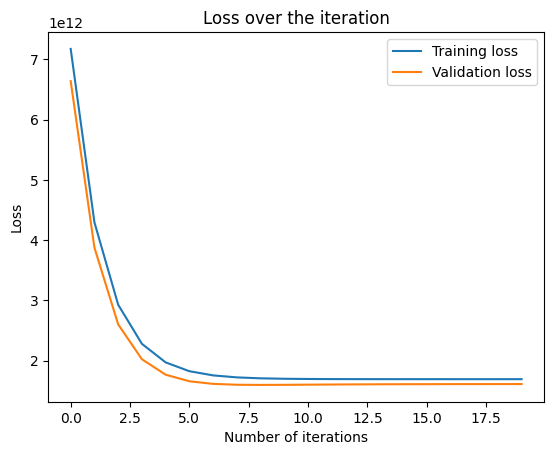

In [ ]:
plt.plot([x for x in range(iterations)],cost1,label="Training loss")
plt.plot([x for x in range(iterations)],cost2,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

Problem 1b

In [ ]:
input_variables1 = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
new_data1 = data[input_variables1].replace({'yes':1,'no':0})
new_data1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [ ]:
np.random.seed(0)
train1, test1 = train_test_split(new_data1, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
x_train1 = train1.iloc[:,1:]
m = x_train1.shape[0]
y_train1 = np.array(train1.iloc[:,0],dtype=np.float128).reshape(m,1)
x_train1 = np.array(x_train1,dtype=np.float128)
f_col = np.ones((m,1))
x_train1 = np.hstack((f_col,x_train1))

In [ ]:
x_test1 = test1.iloc[:,1:]
m = x_test1.shape[0]
y_test1 = np.array(test1.iloc[:,0],dtype=np.float128).reshape(m,1)
x_test1= np.array(x_test1,dtype=np.float128)
f_col = np.ones((m,1))
x_test1= np.hstack((f_col,x_test1))

In [ ]:
theta = np.zeros(12).reshape(12,1)
iterations = 20
learning_rate= 0.00000001
theta12,cost12,cost22 = gradient_value(x_train1,x_test1,y_train1,y_test1,theta,iterations,learning_rate)
print(theta12)

[[2.14737349e-01]
 [8.61411808e+02]
 [6.97574183e-01]
 [3.48837997e-01]
 [5.07422205e-01]
 [1.91120290e-01]
 [5.59677508e-02]
 [9.57391008e-02]
 [2.14103447e-02]
 [1.09939427e-01]
 [1.78074180e-01]
 [6.78678929e-02]]


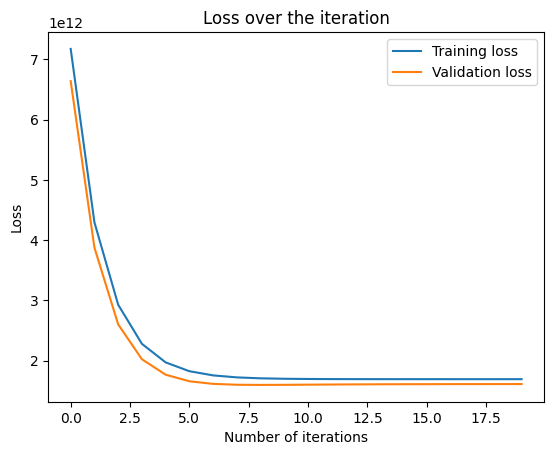

In [ ]:
plt.plot([x for x in range(iterations)],cost1,label="Training loss")
plt.plot([x for x in range(iterations)],cost2,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

Problem 2a

 Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
variables = ["area", "bedrooms", "bathrooms", "stories", "parking"]
train[variables] = scaler.fit_transform(train[variables])
test[variables] = scaler.fit_transform(test[variables])
train.head()

,price,area,bedrooms,bathrooms,stories,parking
22,8645000,0.432609,0.4,0.000000,0.000000,0.333333
41,7840000,0.314954,0.4,0.333333,1.000000,0.000000
91,6419000,0.342105,0.2,0.000000,0.000000,0.666667
118,5950000,0.319131,0.4,0.000000,0.000000,0.000000
472,3010000,0.124896,0.6,0.000000,0.333333,1.000000


In [ ]:
x_train21 = train.iloc[:,1:]
m = x_train21.shape[0]
y_train21 = np.array(train.iloc[:,0],dtype=np.float128).reshape(m,1)
x_train21 = np.array(x_train21,dtype=np.float128)
f_col = np.ones((m,1))
x_train21 = np.hstack((f_col,x_train21))


In [ ]:
x_test21 = test.iloc[:,1:]
m = x_test.shape[0]
y_test21 = np.array(test.iloc[:,0],dtype=np.float128).reshape(m,1)
x_test21 = np.array(x_test21,dtype=np.float128)
f_col = np.ones((m,1))
x_test21= np.hstack((f_col,x_test21))

In [ ]:
theta = np.zeros(6).reshape(6,1)
iterations = 1500
learning_rate= 0.01
theta21,cost121,cost221 = gradient_value(x_train21,x_test21,y_train21,y_test21,theta,iterations,learning_rate)
print(theta21)
print(cost121)

[[2863771.94409521]
 [1954747.11973015]
 [1425590.53595095]
 [1609973.32946793]
 [1646942.61178315]
 [1430076.37206751]]
[1.29111285e+13 1.25923490e+13 1.22822200e+13 ... 9.22695450e+11
 9.22610438e+11 9.22525489e+11]


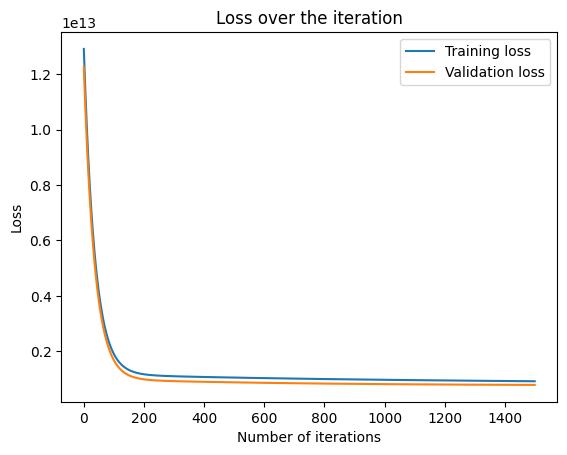

In [ ]:
plt.plot([x for x in range(iterations)],cost121,label="Training loss")
plt.plot([x for x in range(iterations)],cost221,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()